In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
%matplotlib inline
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

In [2]:
# 현재 경로 기준으로 coronavirusdataset_20200601파일 존재
#data_path로 경로 지정
#data_path_list에 자료별 경로 지정
#.cvs파일 형식은 제거

data_path = os.path.join(os.getcwd(),"coronavirusdataset_20200601")

data_path_list = {}

for data_file in os.listdir(data_path):
    data_path_list[data_file.strip('.csv')]= os.path.join(data_path, data_file)
    
#t각 파일들을 읽어들여 전체 파일로 저장

total_data = {}

for name, data_path in data_path_list.items():
    if os.path.isfile(data_path):
        total_data[name.lower()] = pd.read_csv(data_path)
        
# 파일 목록 확인
total_data.keys()

dict_keys(['case', 'patientinfo', 'patientroute', 'policy', 'region', 'searchtrend', 'seoulfloating', 'time', 'timeage', 'timegender', 'timeprovince', 'weather'])

In [3]:
#파일별 feature확인

data_feature = []
for name, data in total_data.items():
    data_feature.append(data.columns)
    
data_feature = pd.DataFrame(data_feature, index = total_data.keys())

In [4]:
data_feature

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
case,case_id,province,city,group,infection_case,confirmed,latitude,longitude,None,None,None,None,None,None,None,None,None,None
patientinfo,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
patientroute,patient_id,global_num,date,province,city,type,latitude,longitude,None,None,None,None,None,None,None,None,None,None
policy,policy_id,country,type,gov_policy,detail,start_date,end_date,None,None,None,None,None,None,None,None,None,None,None
region,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,None,None,None,None,None,None
searchtrend,date,cold,flu,pneumonia,coronavirus,None,None,None,None,None,None,None,None,None,None,None,None,None
seoulfloating,date,hour,birth_year,sex,province,city,fp_num,None,None,None,None,None,None,None,None,None,None,None
time,date,time,test,negative,confirmed,released,deceased,None,None,None,None,None,None,None,None,None,None,None
timeage,date,time,age,confirmed,deceased,None,None,None,None,None,None,None,None,None,None,None,None,None
timegender,date,time,sex,confirmed,deceased,None,None,None,None,None,None,None,None,None,None,None,None,None


In [5]:
time = total_data['time']

In [6]:
time_confirmed =time[['date', 'confirmed']]

In [7]:
data = pd.read_csv('movie_people.csv')
data['cumsum']=data['people'].cumsum()

In [8]:
data.head()

,date,people,cumsum
0,2020-01-20,196043,196043
1,2020-01-21,188893,384936
2,2020-01-22,461984,846920
3,2020-01-23,614217,1461137
4,2020-01-24,989632,2450769


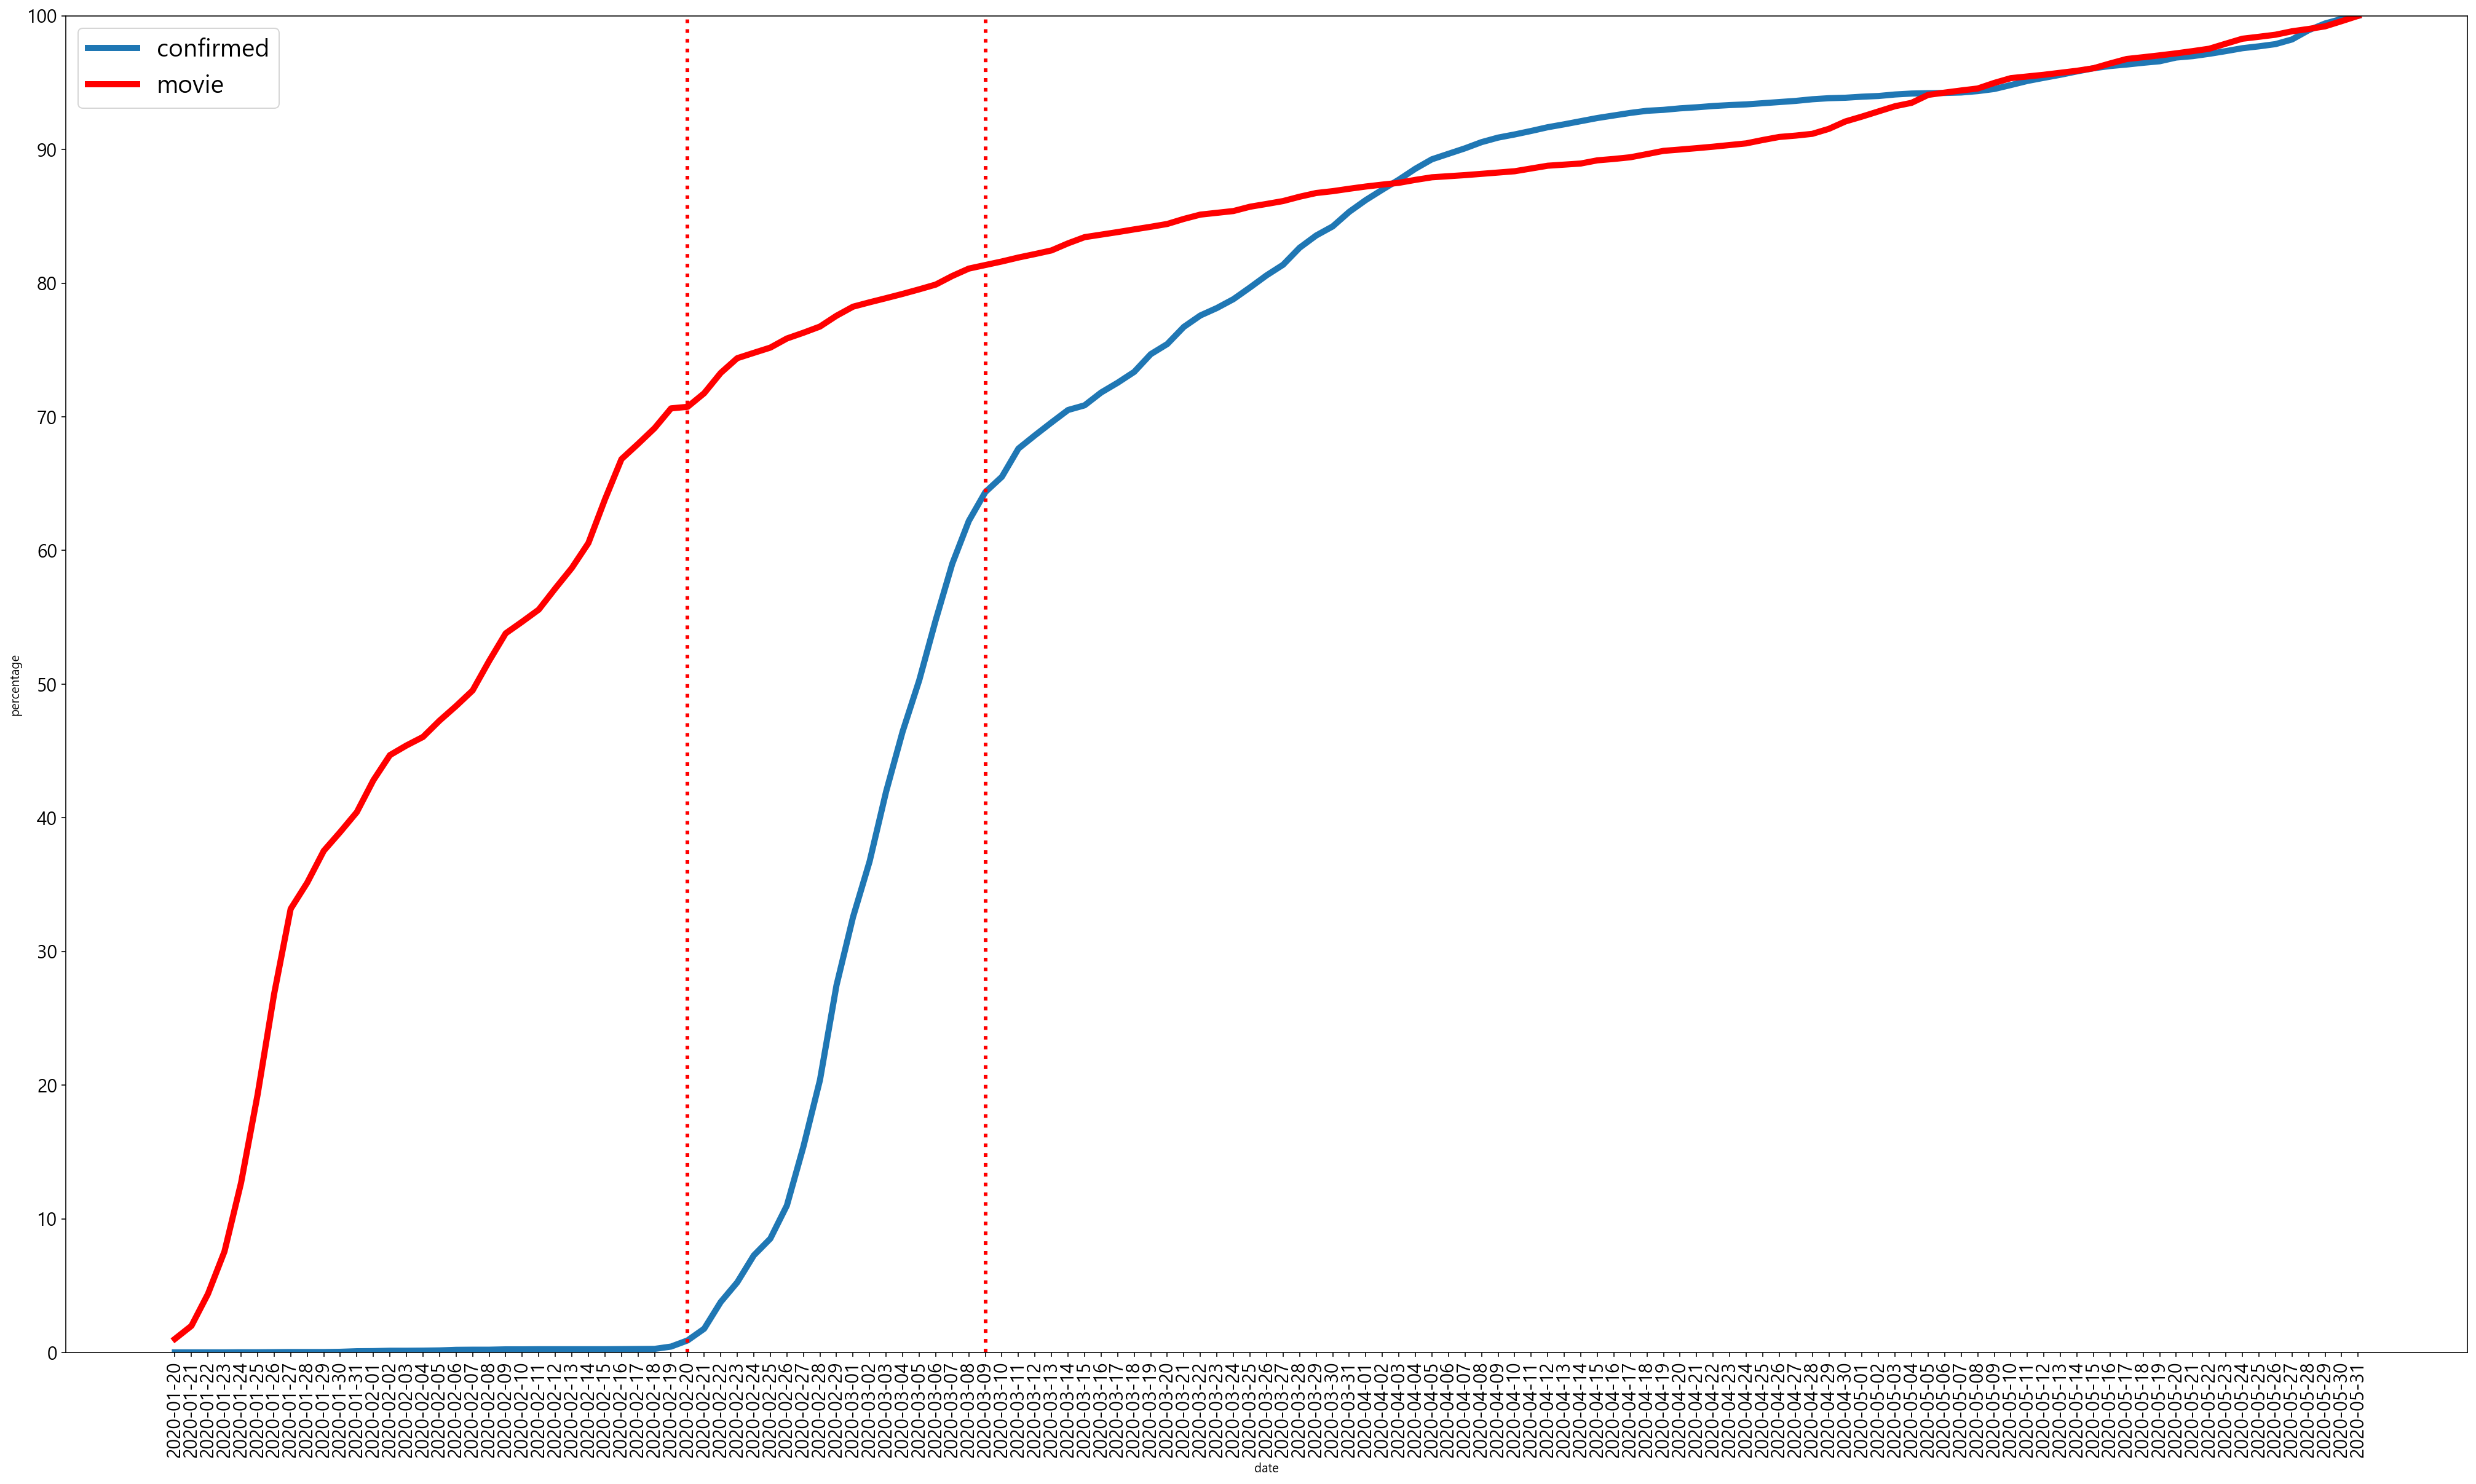

In [9]:
plt.figure(figsize=(35,20))
plt.plot(time_confirmed['date'].astype(str),time_confirmed['confirmed']*100/time_confirmed['confirmed'].max(),linewidth=5,label='confirmed')
plt.plot(data.date,data['cumsum']*100/data['cumsum'].max(),linewidth=5, color ='r',label = 'movie')
plt.axvline(x='2020-02-20',color='r', linestyle=':', linewidth=3)
plt.axvline(x='2020-03-09',color='r', linestyle=':', linewidth=3)
plt.xticks(fontsize =15,rotation=90)
plt.yticks(np.arange(0, 101, step=10),fontsize=15)
plt.ylim(0,100)
plt.xlabel('date')
plt.ylabel('percentage')
plt.legend(loc='upper left', fontsize =20)
plt.show()

In [10]:
weather = total_data['weather']

In [12]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25807 entries, 0 to 25806
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   code                   25807 non-null  int64  
 1   province               25807 non-null  object 
 2   date                   25807 non-null  object 
 3   avg_temp               25792 non-null  float64
 4   min_temp               25802 non-null  float64
 5   max_temp               25804 non-null  float64
 6   precipitation          25807 non-null  float64
 7   max_wind_speed         25798 non-null  float64
 8   most_wind_direction    25778 non-null  float64
 9   avg_relative_humidity  25787 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.0+ MB
